In [97]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
# Import feature coefficients tables
FE_Feature_Coefficients_LR_Artificiality = pd.read_csv('FE_Feature_Coefficients_LR_Artificiality.csv')
F_Feature_Coefficients_LR_Artificiality = pd.read_csv('F_Feature_Coefficients_LR_Artificiality.csv')
FE_Feature_Coefficients_LR_Expressiveness = pd.read_csv('FE_Feature_Coefficients_LR_Expressiveness.csv')
F_Feature_Coefficients_LR_Expressiveness = pd.read_csv('F_Feature_Coefficients_LR_Expressiveness.csv')
FE_Feature_Coefficients_SVC_Artificiality = pd.read_csv('FE_Feature_Coefficients_SVC_Artificiality.csv')
F_Feature_Coefficients_SVC_Artificiality = pd.read_csv('F_Feature_Coefficients_SVC_Artificiality.csv')
FE_Feature_Coefficients_SVC_Expressiveness = pd.read_csv('FE_Feature_Coefficients_SVC_Expressiveness.csv')
F_Feature_Coefficients_SVC_Expressiveness = pd.read_csv('F_Feature_Coefficients_SVC_Expressiveness.csv')

In [100]:
# Create dictionaries F1-data 
F1_FE_Feature_Coefficients_LR_Artificiality = {
    'Model': 'LR',
    'Feature_Category': 'FE',
    'Feature_Type': 'Artificiality',
    'Feature_Count': 40,
    'F1_Training': 0.8307692307692308,
    'F1_Test': 0.823529411764706
}

F1_FE_Feature_Coefficients_SVC_Artificiality = {
    'Model': 'SVC',
    'Feature_Category': 'FE',
    'Feature_Type': 'Artificiality',
    'Feature_Count': 22,
    'F1_Training': 0.711864406779661,
    'F1_Test': 0.7777777777777777
}

F1_FE_Feature_Coefficients_LR_Expressiveness = {
    'Model': 'LR',
    'Feature_Category': 'FE',
    'Feature_Type': 'Expressiveness',
    'Feature_Count': 16,
    'F1_Training': 0.6857142857142857,
    'F1_Test': 0.5555555555555556
}

F1_FE_Feature_Coefficients_SVC_Expressiveness = {
    'Model': 'SVC',
    'Feature_Category': 'FE',
    'Feature_Type': 'Expressiveness',
    'Feature_Count': 9,
    'F1_Training': 0.6557377049180328,
    'F1_Test': 0.39999999999999997
}

F1_F_Feature_Coefficients_LR_Artificiality = {
    'Model': 'LR',
    'Feature_Category': 'F',
    'Feature_Type': 'Artificiality',
    'Feature_Count': 13,
    'F1_Training': 0.6666666666666667,
    'F1_Test': 0.631578947368421
}

F1_F_Feature_Coefficients_SVC_Artificiality = {
    'Model': 'SVC',
    'Feature_Category': 'F',
    'Feature_Type': 'Artificiality',
    'Feature_Count': 24,
    'F1_Training': 0.7246376811594203,
    'F1_Test': 0.7058823529411765
}

F1_F_Feature_Coefficients_LR_Expressiveness = {
    'Model': 'LR',
    'Feature_Category': 'F',
    'Feature_Type': 'Expressiveness',
    'Feature_Count': 3,
    'F1_Training': 0.65625,
    'F1_Test': 0.3333333333333333
}

F1_F_Feature_Coefficients_SVC_Expressiveness = {
    'Model': 'SVC',
    'Feature_Category': 'F',
    'Feature_Type': 'Expressiveness',
    'Feature_Count': 19,
    'F1_Training': 0.6956521739130435,
    'F1_Test': 0.5
}

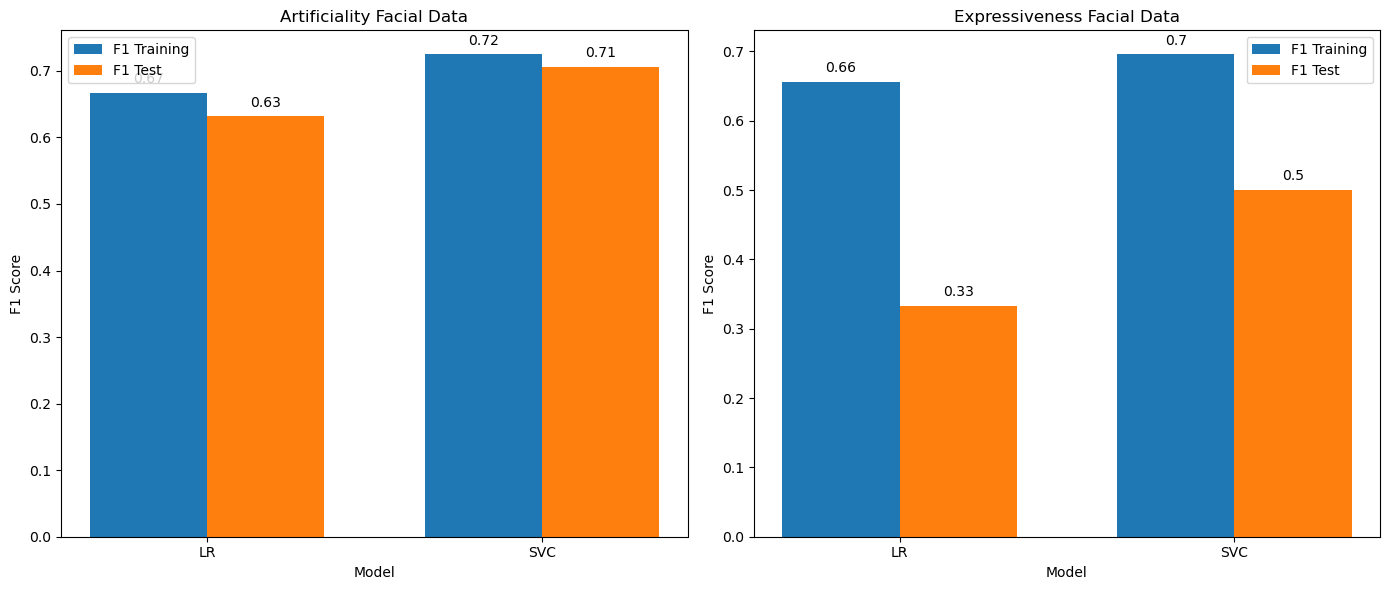

In [134]:
# Facial data
data_artificiality = {
    'LR': {'F1_Training': 0.6666666666666667, 'F1_Test': 0.631578947368421},
    'SVC': {'F1_Training': 0.7246376811594203, 'F1_Test': 0.7058823529411765}
}

data_expressiveness = {
    'LR': {'F1_Training': 0.65625, 'F1_Test': 0.3333333333333333},
    'SVC': {'F1_Training': 0.6956521739130435, 'F1_Test': 0.5}
}

def plot_data(data, title, position):
    models = list(data.keys())
    f1_train_scores = [data[model]['F1_Training'] for model in models]
    f1_test_scores = [data[model]['F1_Test'] for model in models]

    bar_width = 0.35
    index = np.arange(len(models))

    plt.subplot(1, 2, position)
    training_bars = plt.bar(index, f1_train_scores, bar_width, label='F1 Training')
    test_bars = plt.bar(index + bar_width, f1_test_scores, bar_width, label='F1 Test')
    
    # Adding the text on the bars
    for bar in training_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
    for bar in test_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.xticks(index + bar_width / 2, models)
    plt.xlabel('Model')
    plt.ylabel('F1 Score')
    plt.title(title)
    plt.legend()

# Plot
plt.figure(figsize=(14, 6))
plot_data(data_artificiality, 'Artificiality Facial Data', 1)
plot_data(data_expressiveness, 'Expressiveness Facial Data', 2)

plt.tight_layout()
plt.show()

In [140]:
# Facial data
data_artificiality = {
    'LR': {'F1_Training': 0.6666666666666667, 'F1_Test': 0.631578947368421},
    'SVC': {'F1_Training': 0.7246376811594203, 'F1_Test': 0.7058823529411765}
}

data_expressiveness = {
    'LR': {'F1_Training': 0.65625, 'F1_Test': 0.3333333333333333},
    'SVC': {'F1_Training': 0.6956521739130435, 'F1_Test': 0.5}
}

def print_classification_extent(data, attribute):
    for model in data:
        f1_test_score = data[model]['F1_Test']
        statement = (
            f"The extent to which {model} can accurately classify the design attributes "
            f"of the virtual character, encompassing {attribute}, after being trained on facial data: "
            f"{f1_test_score:.2f} (F1 Test Score)"
        )
        print(statement)

# Print the classification extent for both models and attributes
print_classification_extent(data_artificiality, "Artificiality")
print_classification_extent(data_expressiveness, "Expressiveness")

The extent to which LR can accurately classify the design attributes of the virtual character, encompassing Artificiality, after being trained on facial data: 0.63 (F1 Test Score)
The extent to which SVC can accurately classify the design attributes of the virtual character, encompassing Artificiality, after being trained on facial data: 0.71 (F1 Test Score)
The extent to which LR can accurately classify the design attributes of the virtual character, encompassing Expressiveness, after being trained on facial data: 0.33 (F1 Test Score)
The extent to which SVC can accurately classify the design attributes of the virtual character, encompassing Expressiveness, after being trained on facial data: 0.50 (F1 Test Score)


In [118]:
# Merge the two data frames on the 'Feature' column to find common features
common_features_df = pd.merge(
    F_Feature_Coefficients_LR_Artificiality,
    F_Feature_Coefficients_SVC_Artificiality,
    on='Feature',
    suffixes=('_LR', '_SVC')
)

# Calculate the difference and absolute difference
common_features_df['Difference'] = common_features_df['Coefficient_LR'] - common_features_df['Coefficient_SVC']
common_features_df['Abs_Difference'] = common_features_df['Difference'].abs()

# Sort the data frame by the absolute difference in descending order
common_features_df = common_features_df.sort_values(by='Abs_Difference', ascending=False)

# Display the data frame
print(common_features_df)

                       Feature  Coefficient_LR  Coefficient_SVC  Difference  \
5     Left Eyebrow_Lowered_std       -0.235226        -1.040669    0.805443   
0           Right Eye_Open_std        0.456645         1.025244   -0.568600   
1         Right Eye_Closed_std        0.456645         1.025244   -0.568600   
11  Right Eyebrow_Lowered_skew       -0.072436        -0.576850    0.504414   
9          Left Eye_Closed_std       -0.096194        -0.403804    0.307610   
10           Left Eye_Open_std       -0.096194        -0.403804    0.307610   
3        Right Eye_Open_median        0.356948         0.121072    0.235875   
4      Right Eye_Closed_median       -0.356948        -0.121072   -0.235875   
8    Left Eyebrow_Lowered_skew        0.145301         0.318477   -0.173177   
6   Right Eyebrow_Raised_range        0.231855         0.106393    0.125463   
2    Left Eyebrow_Neutral_skew        0.385679         0.305278    0.080400   
7   Right Eyebrow_Neutral_skew        0.153807      

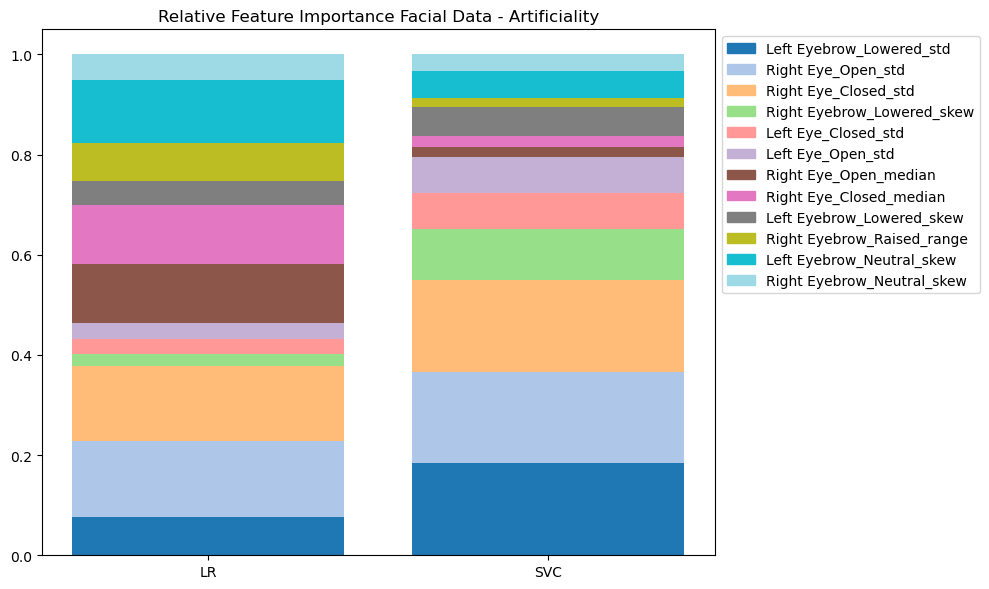

In [119]:
# Normalizing coefficients so that the maximum absolute value is 1.0 for both LR and SVC
lr_norm = common_features_df['Coefficient_LR'].abs() / common_features_df['Coefficient_LR'].abs().sum()
svc_norm = common_features_df['Coefficient_SVC'].abs() / common_features_df['Coefficient_SVC'].abs().sum()

# Creating a color map for each feature
colors = plt.cm.get_cmap('tab20', len(common_features_df))

# Plotting the barplot with a wider figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Stacking the bars for LR
bottom = 0
for i, value in enumerate(lr_norm):
    ax.bar('LR', value, bottom=bottom, color=colors(i))
    bottom += value

# Stacking the bars for SVC
bottom = 0
for i, value in enumerate(svc_norm):
    ax.bar('SVC', value, bottom=bottom, color=colors(i))
    bottom += value

# Adding legend
feature_names = common_features_df['Feature']
patches = [plt.Rectangle((0,0),1,1, color=colors(i)) for i in range(len(feature_names))]
ax.legend(patches, feature_names, loc='upper left', bbox_to_anchor=(1,1))

# Set the title of the plot
ax.set_title('Relative Feature Importance Facial Data - Artificiality')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [120]:
# Merge the two data frames on the 'Feature' column to find common features
common_features_df = pd.merge(
    F_Feature_Coefficients_LR_Expressiveness,
    F_Feature_Coefficients_SVC_Expressiveness,
    on='Feature',
    suffixes=('_LR', '_SVC')
)

# Calculate the difference and absolute difference
common_features_df['Difference'] = common_features_df['Coefficient_LR'] - common_features_df['Coefficient_SVC']
common_features_df['Abs_Difference'] = common_features_df['Difference'].abs()

# Sort the data frame by the absolute difference in descending order
common_features_df = common_features_df.sort_values(by='Abs_Difference', ascending=False)

# Display the data frame
print(common_features_df)

                       Feature  Coefficient_LR  Coefficient_SVC  Difference  \
0  Right Eyebrow_Lowered_range        0.400901         0.113912    0.286989   
1          Left Eye_Closed_std       -0.289854        -0.126585   -0.163269   
2            Left Eye_Open_std       -0.289854        -0.126585   -0.163269   

   Abs_Difference  
0        0.286989  
1        0.163269  
2        0.163269  


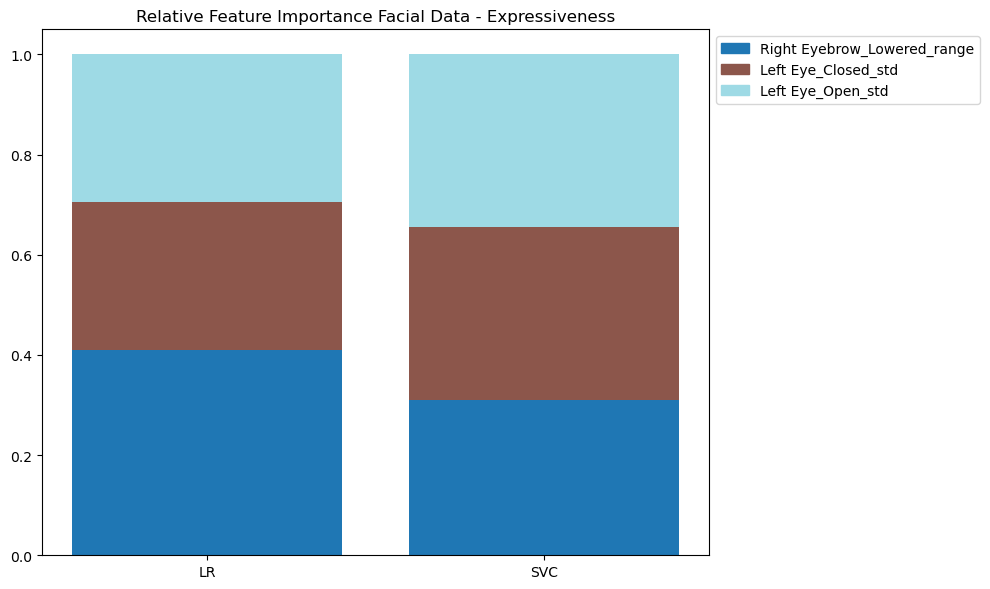

In [121]:
# Normalizing coefficients so that the maximum absolute value is 1.0 for both LR and SVC
lr_norm = common_features_df['Coefficient_LR'].abs() / common_features_df['Coefficient_LR'].abs().sum()
svc_norm = common_features_df['Coefficient_SVC'].abs() / common_features_df['Coefficient_SVC'].abs().sum()

# Creating a color map for each feature
colors = plt.cm.get_cmap('tab20', len(common_features_df))

# Plotting the barplot with a wider figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Wider figure size

# Stacking the bars for LR
bottom = 0
for i, value in enumerate(lr_norm):
    ax.bar('LR', value, bottom=bottom, color=colors(i))
    bottom += value

# Stacking the bars for SVC
bottom = 0
for i, value in enumerate(svc_norm):
    ax.bar('SVC', value, bottom=bottom, color=colors(i))
    bottom += value

# Adding legend
feature_names = common_features_df['Feature']
patches = [plt.Rectangle((0,0),1,1, color=colors(i)) for i in range(len(feature_names))]
ax.legend(patches, feature_names, loc='upper left', bbox_to_anchor=(1,1))

# Set the title of the plot
ax.set_title('Relative Feature Importance Facial Data - Expressiveness')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

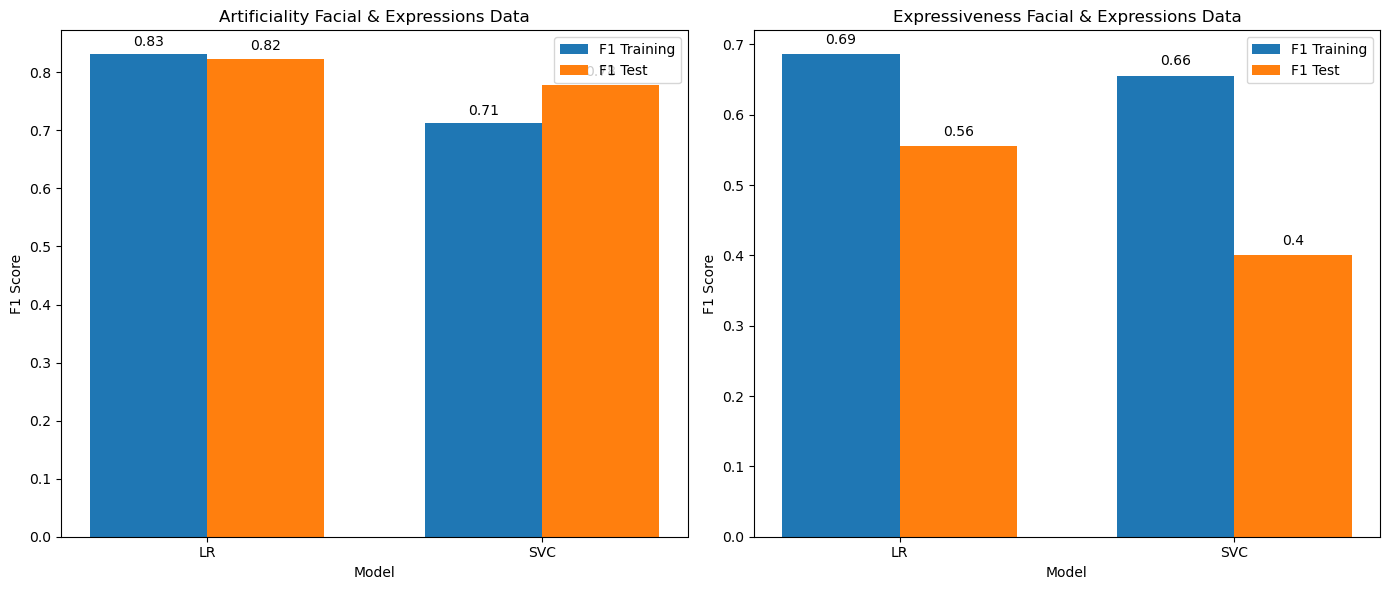

In [130]:
# Data artificiality
data_artificiality = {
    'LR': {'F1_Training': 0.8307692307692308, 'F1_Test': 0.823529411764706},
    'SVC': {'F1_Training': 0.711864406779661, 'F1_Test': 0.7777777777777777}
}

# Data Expressiveness
data_expressiveness = {
    'LR': {'F1_Training': 0.6857142857142857, 'F1_Test': 0.5555555555555556},
    'SVC': {'F1_Training': 0.6557377049180328, 'F1_Test': 0.39999999999999997}
}

def plot_data(data, title, position):
    models = list(data.keys())
    f1_train_scores = [data[model]['F1_Training'] for model in models]
    f1_test_scores = [data[model]['F1_Test'] for model in models]

    bar_width = 0.35
    index = np.arange(len(models))

    plt.subplot(1, 2, position)
    training_bars = plt.bar(index, f1_train_scores, bar_width, label='F1 Training')
    test_bars = plt.bar(index + bar_width, f1_test_scores, bar_width, label='F1 Test')
    
    # Adding the text on the bars
    for bar in training_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
    for bar in test_bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.xticks(index + bar_width / 2, models)
    plt.xlabel('Model')
    plt.ylabel('F1 Score')
    plt.title(title)
    plt.legend()

# Plot
plt.figure(figsize=(14, 6))
plot_data(data_artificiality, 'Artificiality Facial & Expressions Data', 1)
plot_data(data_expressiveness, 'Expressiveness Facial & Expressions Data', 2)

plt.tight_layout()
plt.show()

In [141]:
# Data artificiality
data_artificiality = {
    'LR': {'F1_Training': 0.8307692307692308, 'F1_Test': 0.823529411764706},
    'SVC': {'F1_Training': 0.711864406779661, 'F1_Test': 0.7777777777777777}
}

# Data expressiveness
data_expressiveness = {
    'LR': {'F1_Training': 0.6857142857142857, 'F1_Test': 0.5555555555555556},
    'SVC': {'F1_Training': 0.6557377049180328, 'F1_Test': 0.39999999999999997}
}

def print_classification_extent(data, attribute):
    for model in data:
        f1_test_score = data[model]['F1_Test']
        statement = (
            f"The extent to which {model} can accurately classify the design attributes "
            f"of the virtual character, encompassing {attribute}, after being trained on facial & expressions data: "
            f"{f1_test_score:.2f} (F1 Test Score)"
        )
        print(statement)

# Print the classification extent for both models and attributes
print_classification_extent(data_artificiality, "Artificiality")
print_classification_extent(data_expressiveness, "Expressiveness")

The extent to which LR can accurately classify the design attributes of the virtual character, encompassing Artificiality, after being trained on facial & expressions data: 0.82 (F1 Test Score)
The extent to which SVC can accurately classify the design attributes of the virtual character, encompassing Artificiality, after being trained on facial & expressions data: 0.78 (F1 Test Score)
The extent to which LR can accurately classify the design attributes of the virtual character, encompassing Expressiveness, after being trained on facial & expressions data: 0.56 (F1 Test Score)
The extent to which SVC can accurately classify the design attributes of the virtual character, encompassing Expressiveness, after being trained on facial & expressions data: 0.40 (F1 Test Score)


In [124]:
# Merge the two data frames on the 'Feature' column to find common features
common_features_df = pd.merge(
    FE_Feature_Coefficients_LR_Artificiality,
    FE_Feature_Coefficients_SVC_Artificiality,
    on='Feature',
    suffixes=('_LR', '_SVC')
)

# Calculate the difference and absolute difference
common_features_df['Difference'] = common_features_df['Coefficient_LR'] - common_features_df['Coefficient_SVC']
common_features_df['Abs_Difference'] = common_features_df['Difference'].abs()

# Sort the data frame by the absolute difference in descending order
common_features_df = common_features_df.sort_values(by='Abs_Difference', ascending=False)

# Display the data frame
print(common_features_df)

                        Feature  Coefficient_LR  Coefficient_SVC  Difference  \
9   Right Eyebrow_Lowered_range        0.291285         1.370507   -1.079223   
3                  Angry_median       -0.614440         0.109895   -0.724335   
15    Left Eyebrow_Raised_range       -0.157792         0.339673   -0.497465   
19   Right Eyebrow_Lowered_skew       -0.037885        -0.438474    0.400589   
8      Left Eyebrow_Lowered_std       -0.306940        -0.650079    0.343139   
18                     Sad_mean        0.041490         0.318309   -0.276819   
13            Left Eye_Open_std       -0.188449        -0.411323    0.222874   
12          Left Eye_Closed_std       -0.188449        -0.411323    0.222874   
11   Left Eyebrow_Lowered_range       -0.193447        -0.411780    0.218333   
0                   Angry_range        0.792630         0.659702    0.132928   
10   Left Eyebrow_Neutral_range       -0.290137        -0.408601    0.118464   
14                   Sad_median       -0

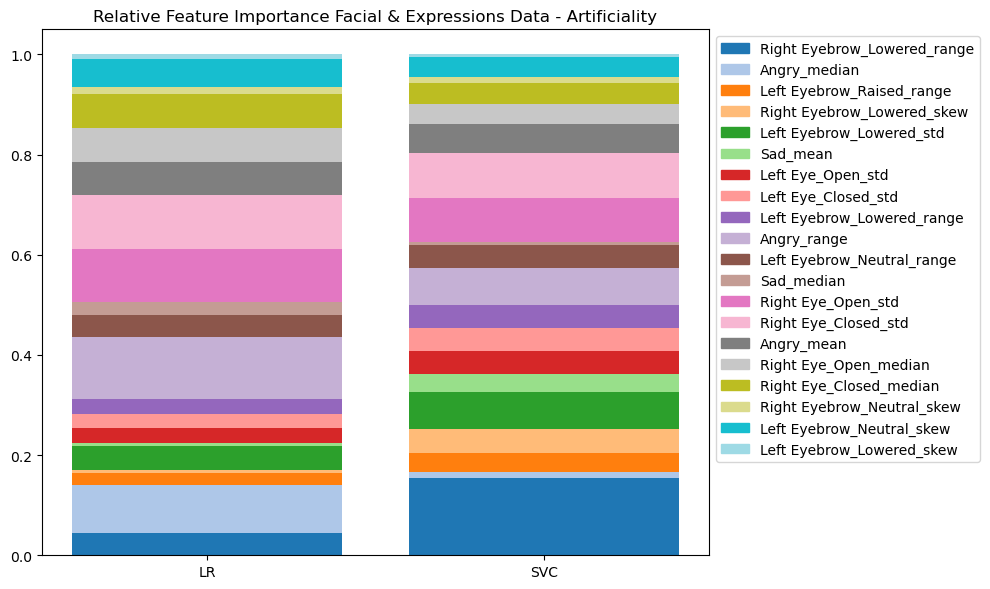

In [125]:
# Normalizing coefficients so that the maximum absolute value is 1.0 for both LR and SVC
lr_norm = common_features_df['Coefficient_LR'].abs() / common_features_df['Coefficient_LR'].abs().sum()
svc_norm = common_features_df['Coefficient_SVC'].abs() / common_features_df['Coefficient_SVC'].abs().sum()

# Creating a color map for each feature
colors = plt.cm.get_cmap('tab20', len(common_features_df))

# Plotting the barplot with a wider figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Wider figure size

# Stacking the bars for LR
bottom = 0
for i, value in enumerate(lr_norm):
    ax.bar('LR', value, bottom=bottom, color=colors(i))
    bottom += value

# Stacking the bars for SVC
bottom = 0
for i, value in enumerate(svc_norm):
    ax.bar('SVC', value, bottom=bottom, color=colors(i))
    bottom += value

# Adding legend
feature_names = common_features_df['Feature']
patches = [plt.Rectangle((0,0),1,1, color=colors(i)) for i in range(len(feature_names))]
ax.legend(patches, feature_names, loc='upper left', bbox_to_anchor=(1,1))

# Set the title of the plot
ax.set_title('Relative Feature Importance Facial & Expressions Data - Artificiality')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [126]:
# Merge the two data frames on the 'Feature' column to find common features
common_features_df = pd.merge(
    FE_Feature_Coefficients_LR_Expressiveness,
    FE_Feature_Coefficients_SVC_Expressiveness,
    on='Feature',
    suffixes=('_LR', '_SVC')
)

# Calculate the difference and absolute difference
common_features_df['Difference'] = common_features_df['Coefficient_LR'] - common_features_df['Coefficient_SVC']
common_features_df['Abs_Difference'] = common_features_df['Difference'].abs()

# Sort the data frame by the absolute difference in descending order
common_features_df = common_features_df.sort_values(by='Abs_Difference', ascending=False)

# Display the data frame 
print(common_features_df)

          Feature  Coefficient_LR  Coefficient_SVC  Difference  Abs_Difference
0  Surprised_skew       -0.047867        -0.010030   -0.037837        0.037837
1      Angry_skew       -0.044500        -0.012919   -0.031581        0.031581
2      Happy_skew        0.038250         0.009444    0.028805        0.028805
3     Scared_skew        0.028743         0.007044    0.021699        0.021699
4  Disgusted_skew        0.018909         0.006882    0.012027        0.012027


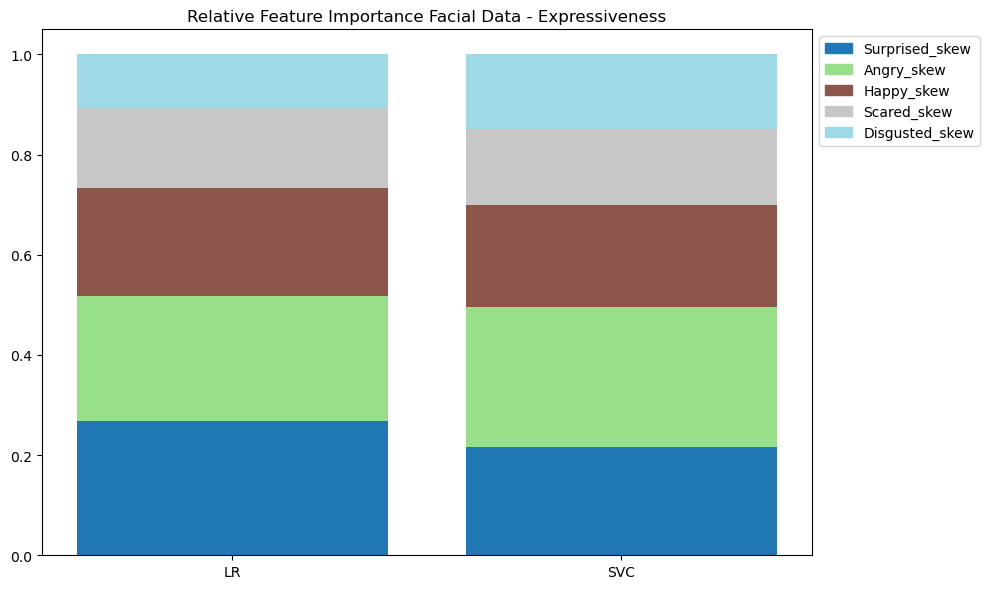

In [127]:
# Normalizing coefficients so that the maximum absolute value is 1.0 for both LR and SVC
lr_norm = common_features_df['Coefficient_LR'].abs() / common_features_df['Coefficient_LR'].abs().sum()
svc_norm = common_features_df['Coefficient_SVC'].abs() / common_features_df['Coefficient_SVC'].abs().sum()

# Creating a color map for each feature
colors = plt.cm.get_cmap('tab20', len(common_features_df))

# Plotting the barplot with a wider figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Stacking the bars for LR
bottom = 0
for i, value in enumerate(lr_norm):
    ax.bar('LR', value, bottom=bottom, color=colors(i))
    bottom += value

# Stacking the bars for SVC
bottom = 0
for i, value in enumerate(svc_norm):
    ax.bar('SVC', value, bottom=bottom, color=colors(i))
    bottom += value

# Adding legend
feature_names = common_features_df['Feature']
patches = [plt.Rectangle((0,0),1,1, color=colors(i)) for i in range(len(feature_names))]
ax.legend(patches, feature_names, loc='upper left', bbox_to_anchor=(1,1))

# Set the title of the plot
ax.set_title('Relative Feature Importance Facial Data - Expressiveness')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

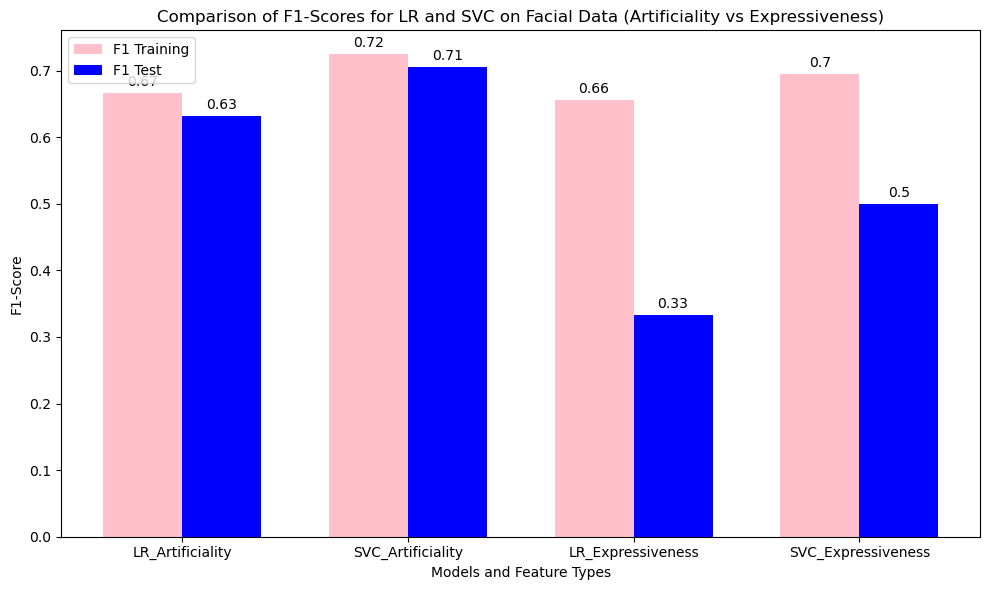

In [128]:
# Define data for Artificiality and Expressiveness on Facial Data (F)
data_Facial = [
    {
        'Model': 'LR',
        'Feature_Type': 'Artificiality',
        'F1_Training': 0.6666666666666667,
        'F1_Test': 0.631578947368421
    },
    {
        'Model': 'SVC',
        'Feature_Type': 'Artificiality',
        'F1_Training': 0.7246376811594203,
        'F1_Test': 0.7058823529411765
    },
    {
        'Model': 'LR',
        'Feature_Type': 'Expressiveness',
        'F1_Training': 0.65625,
        'F1_Test': 0.3333333333333333
    },
    {
        'Model': 'SVC',
        'Feature_Type': 'Expressiveness',
        'F1_Training': 0.6956521739130435,
        'F1_Test': 0.5
    }
]

# Separate the data into lists for plotting
models_Facial = [d['Model'] + "_" + d['Feature_Type'] for d in data_Facial]
f1_training_Facial = [d['F1_Training'] for d in data_Facial]
f1_test_Facial = [d['F1_Test'] for d in data_Facial]

# The x position for bars
x = np.arange(len(models_Facial))

# Bar width
bar_width = 0.35

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Width, Height in inches
rects1 = ax.bar(x - bar_width/2, f1_training_Facial, bar_width, label='F1 Training', color='pink')
rects2 = ax.bar(x + bar_width/2, f1_test_Facial, bar_width, label='F1 Test', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models and Feature Types')
ax.set_ylabel('F1-Score')
ax.set_title('Comparison of F1-Scores for LR and SVC on Facial Data (Artificiality vs Expressiveness)')
ax.set_xticks(x)
ax.set_xticklabels(models_Facial)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add the labels
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()

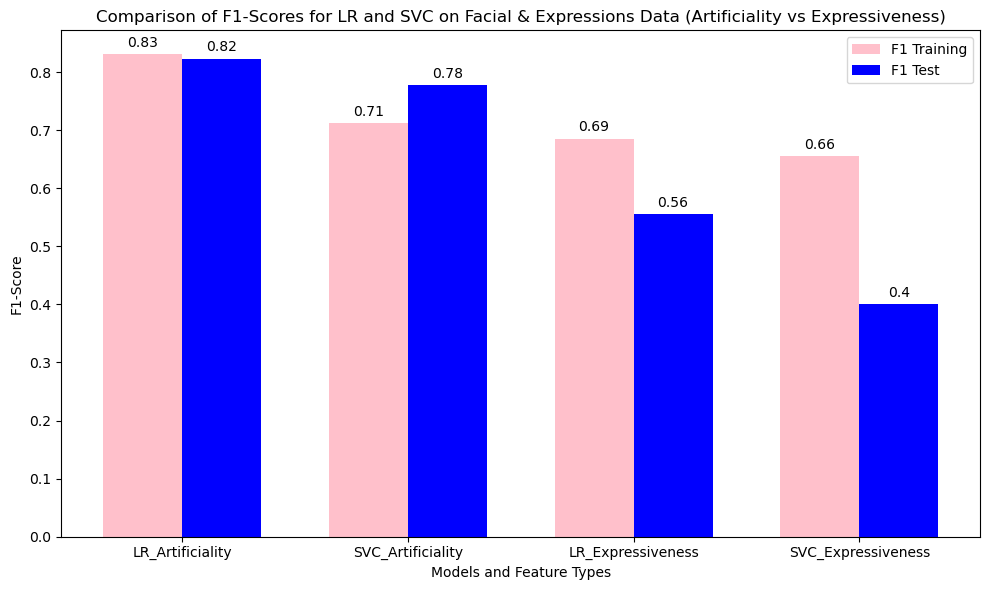

In [129]:
# Define data for Artificiality and Expressiveness on Facial & Expressions Data (FE)
data_FE = [
    {
        'Model': 'LR',
        'Feature_Type': 'Artificiality',
        'F1_Training': 0.8307692307692308,
        'F1_Test': 0.823529411764706
    },
    {
        'Model': 'SVC',
        'Feature_Type': 'Artificiality',
        'F1_Training': 0.711864406779661,
        'F1_Test': 0.7777777777777777
    },
    {
        'Model': 'LR',
        'Feature_Type': 'Expressiveness',
        'F1_Training': 0.6857142857142857,
        'F1_Test': 0.5555555555555556
    },
    {
        'Model': 'SVC',
        'Feature_Type': 'Expressiveness',
        'F1_Training': 0.6557377049180328,
        'F1_Test': 0.39999999999999997
    }
]

# Separate the data into lists for plotting
models_FE = [d['Model'] + "_" + d['Feature_Type'] for d in data_FE]
f1_training_FE = [d['F1_Training'] for d in data_FE]
f1_test_FE = [d['F1_Test'] for d in data_FE]

# The x position for bars
x = np.arange(len(models_FE))

# Bar width
bar_width = 0.35

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Width, Height in inches
rects1 = ax.bar(x - bar_width/2, f1_training_FE, bar_width, label='F1 Training', color='pink')
rects2 = ax.bar(x + bar_width/2, f1_test_FE, bar_width, label='F1 Test', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models and Feature Types')
ax.set_ylabel('F1-Score')
ax.set_title('Comparison of F1-Scores for LR and SVC on Facial & Expressions Data (Artificiality vs Expressiveness)')
ax.set_xticks(x)
ax.set_xticklabels(models_FE)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add the labels
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()

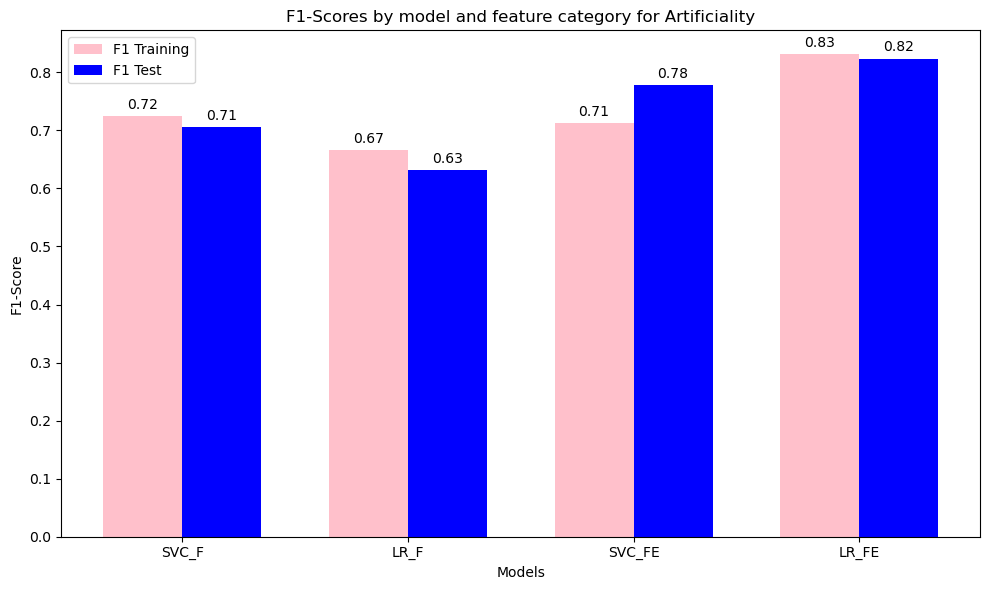

In [131]:
# Define data for artificiality
data_Artificiality = [
    {
        'Model': 'SVC',
        'Feature_Category': 'F',
        'Feature_Type': 'Artificiality',
        'Feature_Count': 24,
        'F1_Training': 0.7246376811594203,
        'F1_Test': 0.7058823529411765
    },
    {
        'Model': 'LR',
        'Feature_Category': 'F',
        'Feature_Type': 'Artificiality',
        'Feature_Count': 13,
        'F1_Training': 0.6666666666666667,
        'F1_Test': 0.631578947368421
    },
    {
        'Model': 'SVC',
        'Feature_Category': 'FE',
        'Feature_Type': 'Artificiality',
        'Feature_Count': 22,
        'F1_Training': 0.711864406779661,
        'F1_Test': 0.7777777777777777
    },
    {
        'Model': 'LR',
        'Feature_Category': 'FE',
        'Feature_Type': 'Artificiality',
        'Feature_Count': 40,
        'F1_Training': 0.8307692307692308,
        'F1_Test': 0.823529411764706
    }
]

# Separate the data into lists for plotting
models_Artificiality = [d['Model'] + "_" + d['Feature_Category'] for d in data_Artificiality]
f1_training_Artificiality = [d['F1_Training'] for d in data_Artificiality]
f1_test_Artificiality = [d['F1_Test'] for d in data_Artificiality]

# The x position for bars
x = np.arange(len(models_Artificiality))

# Bar width
bar_width = 0.35

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Width, Height in inches
rects1 = ax.bar(x - bar_width/2, f1_training_Artificiality, bar_width, label='F1 Training', color='pink')
rects2 = ax.bar(x + bar_width/2, f1_test_Artificiality, bar_width, label='F1 Test', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Scores by model and feature category for Artificiality')
ax.set_xticks(x)
ax.set_xticklabels(models_Artificiality)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add the labels
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()

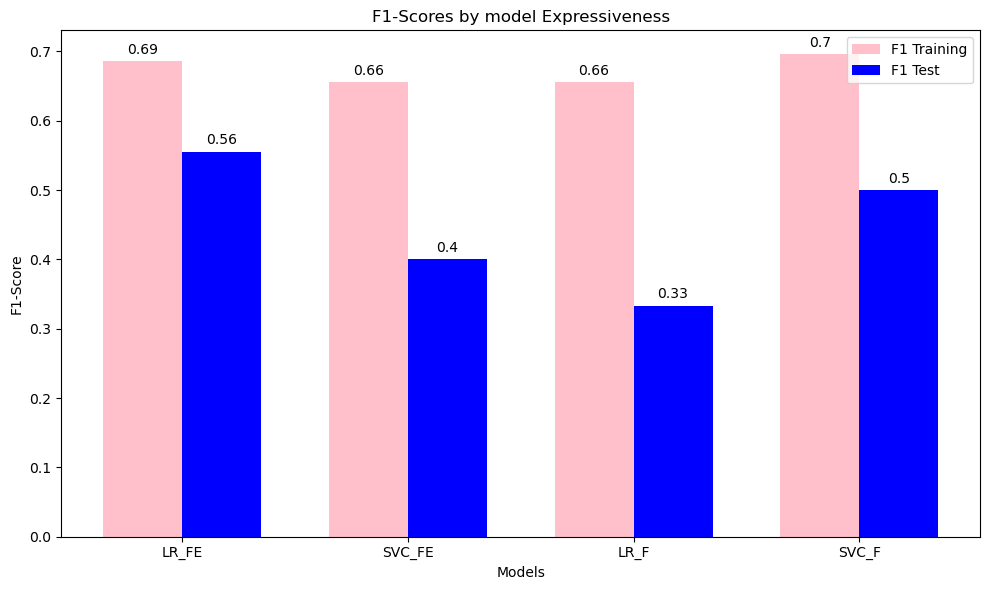

In [132]:
# Define data expressiveness
data_Expressiveness = [
    {
        'Model': 'LR',
        'Feature_Category': 'FE',
        'Feature_Type': 'Expressiveness',
        'Feature_Count': 16,
        'F1_Training': 0.6857142857142857,
        'F1_Test': 0.5555555555555556
    },
    {
        'Model': 'SVC',
        'Feature_Category': 'FE',
        'Feature_Type': 'Expressiveness',
        'Feature_Count': 9,
        'F1_Training': 0.6557377049180328,
        'F1_Test': 0.39999999999999997
    },
    {
        'Model': 'LR',
        'Feature_Category': 'F',
        'Feature_Type': 'Expressiveness',
        'Feature_Count': 3,
        'F1_Training': 0.65625,
        'F1_Test': 0.3333333333333333
    },
    {
        'Model': 'SVC',
        'Feature_Category': 'F',
        'Feature_Type': 'Expressiveness',
        'Feature_Count': 19,
        'F1_Training': 0.6956521739130435,
        'F1_Test': 0.5
    }
]

# Separate the data into lists for plotting
models_Expressiveness = [d['Model'] + "_" + d['Feature_Category'] for d in data_Expressiveness]
f1_training_Expressiveness = [d['F1_Training'] for d in data_Expressiveness]
f1_test_Expressiveness = [d['F1_Test'] for d in data_Expressiveness]

# The x position for bars
x = np.arange(len(models_Expressiveness))

# Bar width
bar_width = 0.35

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Width, Height in inches
rects1 = ax.bar(x - bar_width/2, f1_training_Expressiveness, bar_width, label='F1 Training', color='pink')
rects2 = ax.bar(x + bar_width/2, f1_test_Expressiveness, bar_width, label='F1 Test', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Scores by model Expressiveness')
ax.set_xticks(x)
ax.set_xticklabels(models_Expressiveness)
ax.legend()

# Function to add a label above each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add the labels
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()
plt.show()